 ## Pusiaukirtos metodas ##

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, Eq, exp, solve, LambertW


In [15]:
f = lambda x: np.exp(- x**2) - x
a = 0
b = 1
epsilon = 10**-4

In [16]:
x = symbols('x')
eq = Eq(exp(-x**2) - x, 0)

ats = solve(eq, x)
print(ats)

print(exp(-LambertW(2)/2).evalf())


[exp(-LambertW(2)/2)]
0.652918640419205


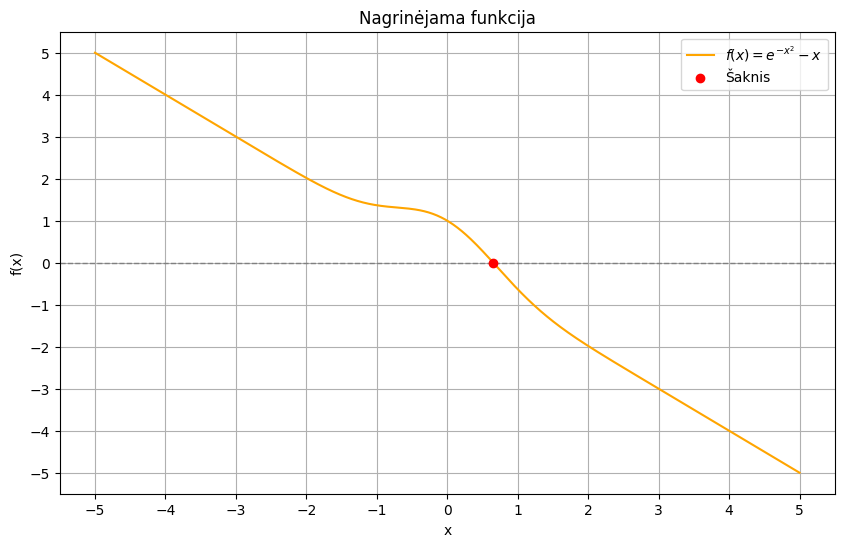

In [18]:
x_vals = np.linspace(-5, 5, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(10,6))
plt.plot(x_vals, y_vals, color="orange", label=r"$f(x) = e^{-x^2} - x$")
plt.axhline(0, color="grey", linewidth=1, linestyle="--")  # x ašis
plt.title("Nagrinėjama funkcija")
plt.scatter([ats], [0], color='red', zorder=5, label="Šaknis")  # pažymime sprendinį
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-5, 6, 1))
plt.grid(True)
plt.legend()
plt.show()

In [19]:
def pusiaukirtos(f, a, b, epsilon, max_iter=50):
    rez = []
    n = 0
    while (b - a) / 2 >= epsilon and n < max_iter:
        c = (a + b) / 2
        fc = f(c)
        rez.append([n, a, b, c, fc, (b - a) / 2])
        
        if f(a) * fc < 0:
            b = c
        else:
            a = c
        n += 1

    c = (a + b) / 2
    fc = f(c)
    rez.append([n, a, b, c, fc, (b - a) / 2])

    df = pd.DataFrame(rez, columns=["n", "a_n", "b_n", "c_n", "f(c_n)", "|b_n - a_n|/2"])
    return df, c  

df, root = pusiaukirtos(f, a, b, epsilon)
print("------------------------------------------------------------")
print(df)
print("------------------------------------------------------------")
print(f"Rasta šaknis: {root:.10f}")


------------------------------------------------------------
     n       a_n       b_n       c_n    f(c_n)  |b_n - a_n|/2
0    0  0.000000  1.000000  0.500000  0.278801       0.500000
1    1  0.500000  1.000000  0.750000 -0.180217       0.250000
2    2  0.500000  0.750000  0.625000  0.051634       0.125000
3    3  0.625000  0.750000  0.687500 -0.064156       0.062500
4    4  0.625000  0.687500  0.656250 -0.006173       0.031250
5    5  0.625000  0.656250  0.640625  0.022760       0.015625
6    6  0.640625  0.656250  0.648438  0.008300       0.007812
7    7  0.648438  0.656250  0.652344  0.001065       0.003906
8    8  0.652344  0.656250  0.654297 -0.002554       0.001953
9    9  0.652344  0.654297  0.653320 -0.000744       0.000977
10  10  0.652344  0.653320  0.652832  0.000160       0.000488
11  11  0.652832  0.653320  0.653076 -0.000292       0.000244
12  12  0.652832  0.653076  0.652954 -0.000066       0.000122
13  13  0.652832  0.652954  0.652893  0.000047       0.000061
---------

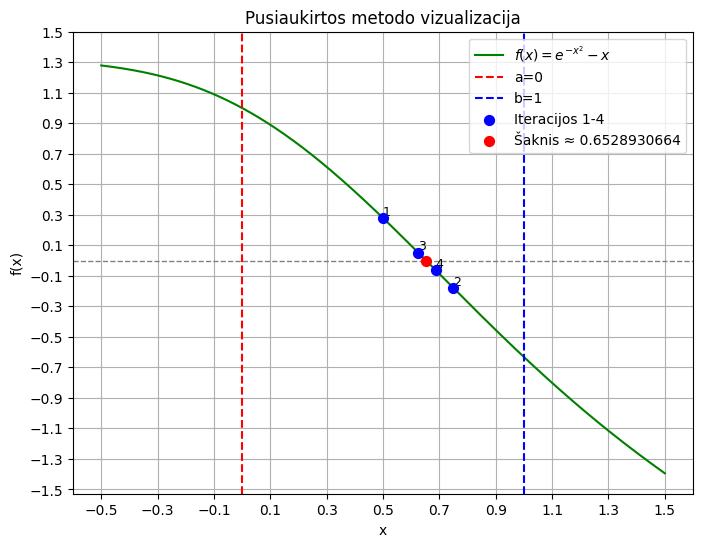

In [20]:
x_vals = np.linspace(a-0.5, b+0.5, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(8,6))
plt.axhline(0, color='grey', linewidth=1, linestyle='--')  
plt.plot(x_vals, y_vals, color="green", label=r"$f(x) = e^{-x^2} - x$")
plt.axvline(a, color="red", linestyle="--", label=f"a={a}")
plt.axvline(b, color="blue", linestyle="--", label=f"b={b}")
plt.scatter(df["c_n"].iloc[0:4], df["f(c_n)"].iloc[0:4], color="blue", s=50, zorder=5, label="Iteracijos 1-4")
plt.scatter(root, f(root), color='red', s=50, zorder=5, label=f"Šaknis ≈ {root:.10f}")

for i, (x, y) in enumerate(zip(df["c_n"].iloc[0:4], df["f(c_n)"].iloc[0:4])):
    plt.text(x, y, f"{i+1}", fontsize=9, ha="left", va="bottom")

plt.title("Pusiaukirtos metodo vizualizacija")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xticks(np.arange(-0.5, 1.7, 0.2))
plt.yticks(np.arange(-1.5, 1.7, 0.2))
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


## Paprastųjų įteracijų metodas

In [21]:
def paprastuju_iteraciju(phi, x0, epsilon, q, max_iter=100):
    x = x0
    n = 0
    rez = []
    
    riba = (1 - q) / q * epsilon  
    
    while n < max_iter:
        x_new = phi(x)
        diff = abs(x_new - x)
        rez.append({"n": n+1, "x_n": x_new, "|x_{n+1}-x_n|": diff})
        
        if diff <= riba:
            break
        
        x = x_new
        n += 1
    
    df = pd.DataFrame(rez)
    if n == max_iter-1 and diff > riba:
        raise ValueError("Metodas nesukonvergavo per duotą iteracijų skaičių")
    
    return x_new, df, n+1

In [22]:
phi = lambda x: np.exp(- x**2)
epsilon = 10**-4
x0 = 0.7
q=0.86

In [23]:
(1-q)/q*epsilon

1.6279069767441862e-05

In [24]:
phi_isvestine = lambda x: -2*x*np.exp(-x**2)
a, b = 0, 1 

x_vals = np.linspace(a, b, 10000)
q = np.max(np.abs(phi_isvestine(x_vals)))

print("q:", q)

q: 0.8577638827281808


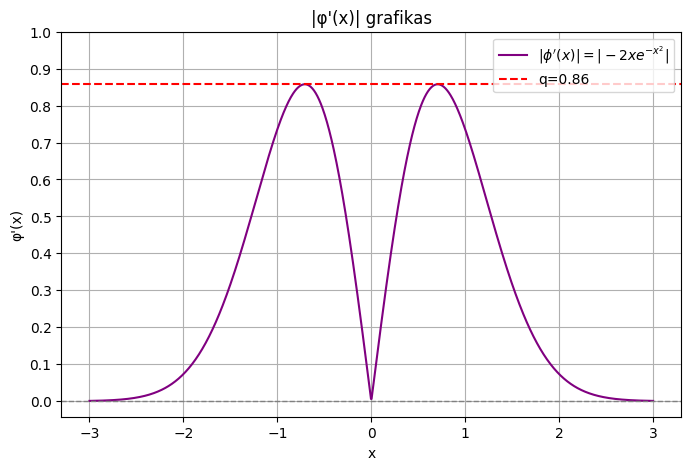

In [25]:
phi_deriv = lambda x: -2*x*np.exp(-x**2)
x_vals = np.linspace(-3, 3, 1000)
y_vals = phi_deriv(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, abs(y_vals), color="purple", label=r"$|\phi'(x)| = |-2x e^{-x^2}|$")
plt.axhline(0, color="grey", linewidth=1, linestyle="--")
plt.axhline(q, color="red", linestyle="--", label="q=0.86")
plt.title("|φ'(x)| grafikas")
plt.xlabel("x")
plt.ylabel("φ'(x)")
plt.legend(loc="upper right")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.legend()
plt.show()

In [26]:

root, table, n_iter = paprastuju_iteraciju(phi, x0, epsilon, q)

print("Aproksimuotas sprendinys:", root)
print("Iteracijų skaičius:", n_iter)
print("-------------------------------------------------------------")
print(table)


Aproksimuotas sprendinys: 0.6529113511531036
Iteracijų skaičius: 55
-------------------------------------------------------------
     n       x_n  |x_{n+1}-x_n|
0    1  0.612626       0.087374
1    2  0.687075       0.074449
2    3  0.623708       0.063367
3    4  0.677726       0.054018
4    5  0.631718       0.046009
5    6  0.670946       0.039228
6    7  0.637521       0.033425
7    8  0.666022       0.028501
8    9  0.641732       0.024290
9   10  0.662444       0.020712
10  11  0.644789       0.017655
11  12  0.659843       0.015054
12  13  0.647010       0.012833
13  14  0.657953       0.010942
14  15  0.648624       0.009328
15  16  0.656578       0.007954
16  17  0.649797       0.006781
17  18  0.655579       0.005782
18  19  0.650650       0.004929
19  20  0.654853       0.004203
20  21  0.651269       0.003583
21  22  0.654325       0.003055
22  23  0.651720       0.002605
23  24  0.653941       0.002221
24  25  0.652047       0.001894
25  26  0.653662       0.001614
26  27

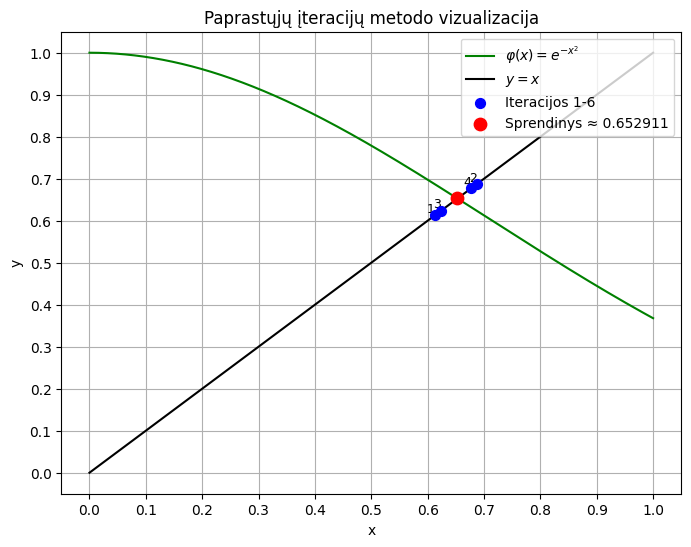

In [13]:
x_vals = np.linspace(a, b, 1000)
phi_vals = phi(x_vals)

plt.figure(figsize=(8,6))
plt.plot(x_vals, phi_vals, color="green", label=r"$\varphi(x) = e^{-x^2}$")
plt.plot(x_vals, x_vals, color="black", label=r"$y=x$")

plt.scatter(table["x_n"].iloc[:4], table["x_n"].iloc[:4], color="blue", s=50, zorder=5, label="Iteracijos 1-6")
for i in range(4):
    plt.text(table["x_n"].iloc[i], table["x_n"].iloc[i], f"{i+1}", fontsize=9, ha="right", va="bottom")

plt.scatter(root, root, color="red", s=80, zorder=6, label=f"Sprendinys ≈ {root:.6f}")

plt.title("Paprastųjų įteracijų metodo vizualizacija")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.legend(loc="upper right")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.show()